In [ ]:
import os
import warnings
import math
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
import seaborn as sns

SyntaxError: invalid non-printable character U+00A0 (<ipython-input-1-c9b8ace7e4f4>, line 11)

In [ ]:
import os
import warnings
import math
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
import seaborn as sns

In [ ]:
test_data = pd.read_csv('/exoTest[1].csv')
train_data = pd.read_csv('/exoTrain[1].csv')

In [ ]:
train_data.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [ ]:
categ = {2: 1,1: 0}
train_data.LABEL = [categ[item] for item in train_data.LABEL]
test_data.LABEL = [categ[item] for item in test_data.LABEL]

In [ ]:
train_data.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,0.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,0.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,0.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,0.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,0.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,1.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


In [ ]:
train_data.isna().values.sum()

0

Text(0.5, 0.98, '(0: Not Exoplanet || 1: Exoplanet)\n')

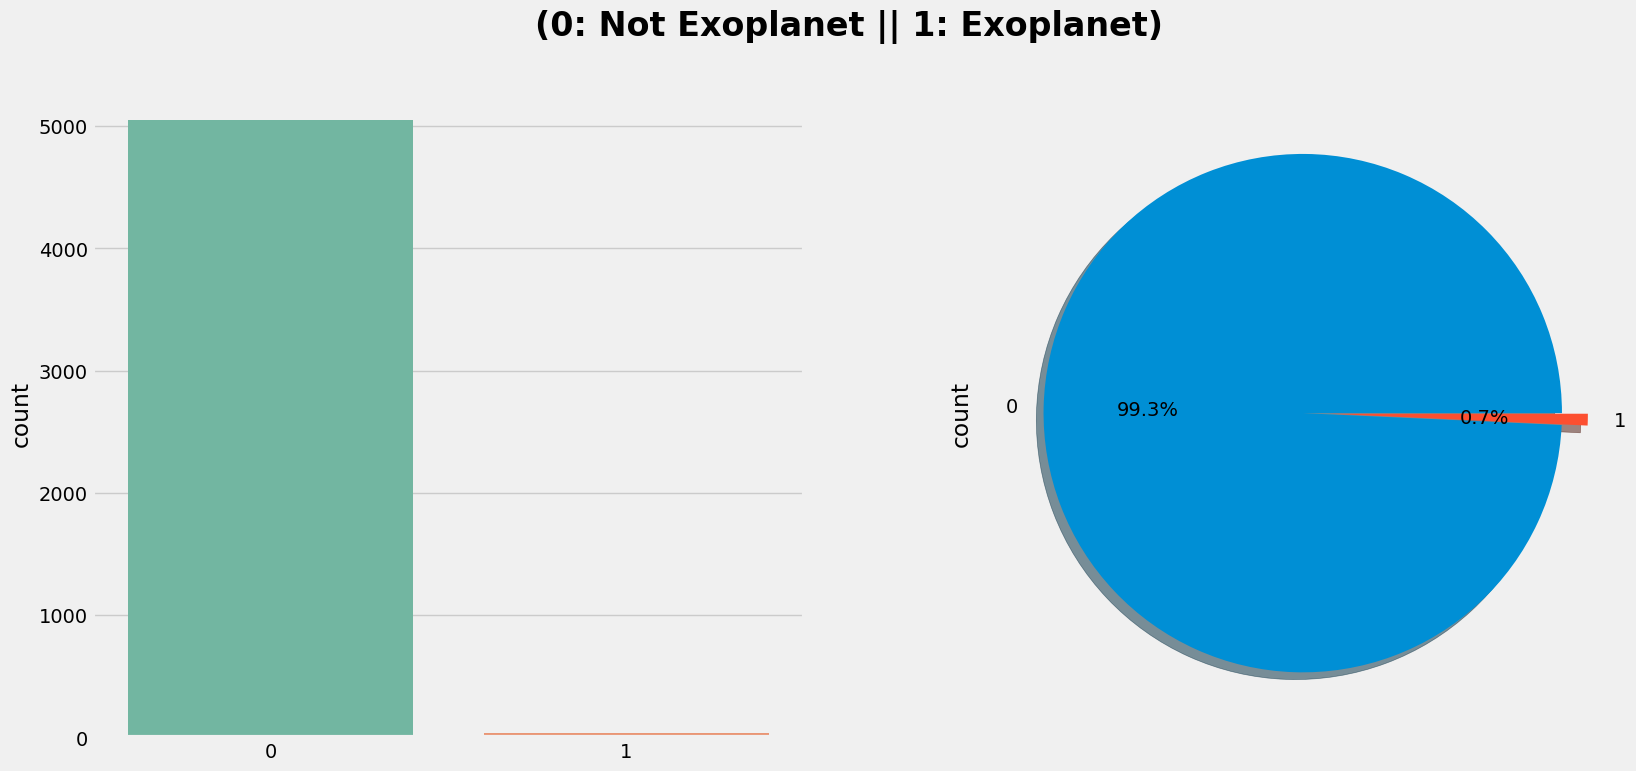

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))
sns.countplot(x = 'LABEL', data=train_data, palette = "Set2", ax = ax[0])
ax[0].set_xlabel('')
train_data['LABEL'].value_counts().plot.pie(explode = [0,0.1], autopct ='%1.1f%%',ax = ax[1], shadow = True)
fig.suptitle('(0: Not Exoplanet || 1: Exoplanet)\n', fontsize = 24, fontweight = 'bold')


In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(train_data.corr())
plt.title('Correlation in the data')
plt.show()

In [11]:
train_y=train_data[train_data['LABEL'] == 1]
train_n=train_data[train_data['LABEL'] < 1]
train_t_n=train_n.iloc[:,1:].T
train_t_y=train_y.iloc[:,1:].T
train_t_y.head(1)

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
FLUX.1,93.85,-38.88,532.64,326.52,-1107.21,211.1,9.34,238.77,-103.54,-265.91,...,124.39,-63.5,31.29,-472.5,194.82,26.96,43.07,-248.23,22.82,26.24


In [12]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(rows=2, cols=2,subplot_titles=("Flux variation of star 37", "Flux variation of star 5086",
                                                   "Flux variation of star 3000", "Flux variation of star 3001"))
fig.add_trace(
    go.Scatter(y=train_t_n[37], x=train_t_n.index),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(y=train_t_n[5086], x=train_t_n.index),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(y=train_t_n[3000], x=train_t_n.index),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(y=train_t_n[3001], x=train_t_n.index),
    row=2, col=2
)
fig.update_layout(height=600, width=800, title_text="Non Exoplanets Star examples",showlegend=False)
fig.show()

In [13]:
fig = make_subplots(rows=2, cols=2,subplot_titles=("Flux variation of star 0", "Flux variation of star 1",
                                                   "Flux variation of star 35", "Flux variation of star 36"))
fig.add_trace(
    go.Scatter(y=train_t_y[0], x=train_t_y.index),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(y=train_t_y[1], x=train_t_y.index),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(y=train_t_y[35], x=train_t_y.index),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(y=train_t_y[36], x=train_t_y.index),
    row=2, col=2
)
fig.update_layout(height=600, width=800, title_text="Exoplanets Stars examples",showlegend=False)

In [14]:
from sklearn.preprocessing import StandardScaler
trainx=train_data.iloc[:,1:]
textx=test_data.iloc[:,1:]
scaler=StandardScaler()
train_scaled=scaler.fit_transform(trainx)
test_scaled=scaler.fit_transform(textx)

In [15]:
trainy=train_data[['LABEL']]
testy=test_data[['LABEL']]
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(train_scaled, trainy['LABEL'])
y_pred = svclassifier.predict(test_scaled)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(testy, y_pred))
print(classification_report(testy, y_pred))

[[556   9]
 [  5   0]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       565
           1       0.00      0.00      0.00         5

    accuracy                           0.98       570
   macro avg       0.50      0.49      0.49       570
weighted avg       0.98      0.98      0.98       570



In [16]:
svclassifier = SVC(kernel='poly')
svclassifier.fit(train_scaled, trainy['LABEL'])
y_pred = svclassifier.predict(test_scaled)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(testy, y_pred))
print(classification_report(testy, y_pred))


[[565   0]
 [  5   0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       565
           1       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



In [17]:
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(train_scaled, trainy['LABEL'])
y_pred = svclassifier.predict(test_scaled)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(testy, y_pred))
print(classification_report(testy, y_pred))

[[565   0]
 [  5   0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       565
           1       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



In [18]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(train_scaled)
PCA(n_components=6)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
trns_x=pca.transform(train_scaled)
trns_y=pca.transform(test_scaled)
testy

[0.27373539 0.22536219 0.14929127 0.09802696 0.05819974 0.04072856]
[2109.92811427 1914.4441909  1558.18634093 1262.62663108  972.8876534
  813.86372792]


,LABEL
0,1
1,1
2,1
3,1
4,1
...,...
565,0
566,0
567,0
568,0


In [19]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(trns_x, trainy['LABEL'])
y_pred = svclassifier.predict(trns_y)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(testy['LABEL'], y_pred))
print(classification_report(testy['LABEL'], y_pred))

[[565   0]
 [  5   0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       565
           1       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



In [20]:
trainy.loc[trainy['LABEL'] == 0, 'new1'] = 0
trainy.loc[trainy['LABEL'] > 0, 'new1'] = 1
testy.loc[testy['LABEL'] > 0, 'new1'] = 1
testy.loc[testy['LABEL'] == 0, 'new1'] = 0

In [21]:
import statsmodels.api as sm
logit_model=sm.Logit(trainy['new1'],trns_x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 3
                         Results: Logit
Model:              Logit            Method:           MLE      
Dependent Variable: new1             Pseudo R-squared: -15.098  
Date:               2024-12-08 04:13 AIC:              7064.0771
No. Observations:   5087             BIC:              7103.2838
Df Model:           5                Log-Likelihood:   -3526.0  
Df Residuals:       5081             LL-Null:          -219.04  
Converged:          1.0000           LLR p-value:      1.0000   
No. Iterations:     3.0000           Scale:            1.0000   
-------------------------------------------------------------------
       Coef.     Std.Err.       z       P>|z|      [0.025    0.975]
-------------------------------------------------------------------
x1     0.0000      0.0009     0.0165    0.9868    -0.0018    0.0019
x2    -0.0000      0.0010    -0.0013    0.9989    -0.0020    0.002

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(trns_x, trainy['new1'])
y_pred = logreg.predict(trns_y)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(trns_y, testy['new1'])))

Accuracy of logistic regression classifier on test set: 0.99


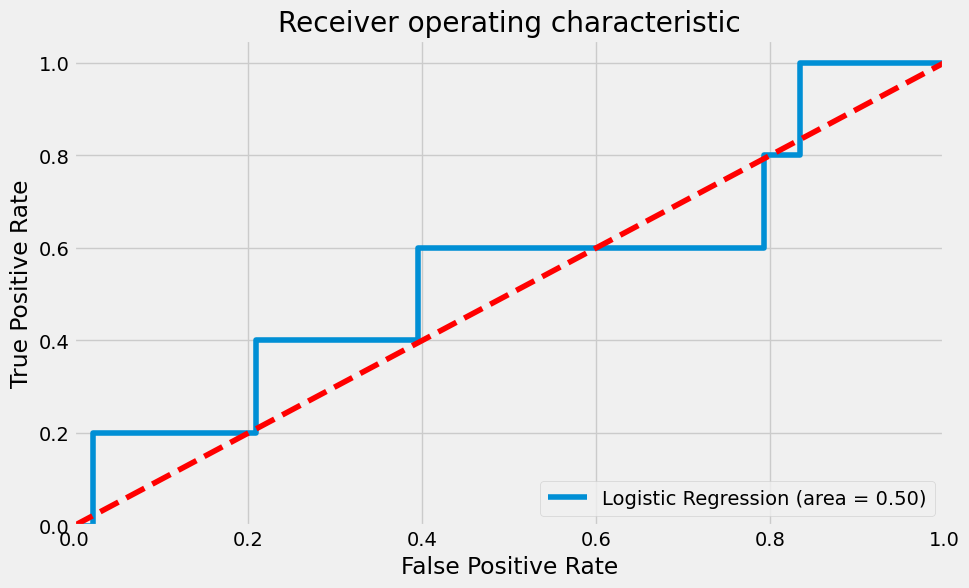

In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
logit_roc_auc = roc_auc_score(testy['new1'], logreg.predict(trns_y))
fpr, tpr, thresholds = roc_curve(testy['new1'], logreg.predict_proba(trns_y)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [24]:
from imblearn.over_sampling import SMOTE
over = SMOTE(random_state=0)
ov_train_x,ov_train_y=over.fit_resample(trns_x, trainy['new1'])
ov_train_y=ov_train_y.astype('int')
ov_train_y.value_counts()

,count
new1,
1,5050
0,5050


In [25]:
ov_train_y=ov_train_y.values.tolist()
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(ov_train_x, ov_train_y)
y_pred = svclassifier.predict(trns_y)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(testy['new1'], y_pred))
print(classification_report(testy['new1'], y_pred))

[[552  13]
 [  4   1]]
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       565
         1.0       0.07      0.20      0.11         5

    accuracy                           0.97       570
   macro avg       0.53      0.59      0.55       570
weighted avg       0.98      0.97      0.98       570



In [26]:
import numpy as np
ov_train_y=np.array(ov_train_y)
ov_train_y.dtype
from sklearn.model_selection import train_test_split
tr_x,v_x,tr_y,V_y= train_test_split(ov_train_x, ov_train_y, test_size=0.2)

print(len(v_x))

2020


Epoch 1/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5027 - loss: 4.4539 - val_accuracy: 0.5757 - val_loss: 4.3821 - learning_rate: 3.1623e-04
Epoch 2/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6036 - loss: 4.3780 - val_accuracy: 0.6322 - val_loss: 4.3649 - learning_rate: 3.1623e-04
Epoch 3/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6070 - loss: 4.3588 - val_accuracy: 0.5901 - val_loss: 4.3504 - learning_rate: 3.1623e-04
Epoch 4/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6086 - loss: 4.3430 - val_accuracy: 0.5866 - val_loss: 4.3369 - learning_rate: 3.1623e-04
Epoch 5/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6144 - loss: 4.3273 - val_accuracy: 0.6267 - val_loss: 4.3232 - learning_rate: 3.1623e-04
Epoch 6/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6161 - loss: 4.3136 - val_accuracy: 0.5950 - val_loss: 4.3110 - learning_rate: 3.1623e-04
Epoch 7/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 

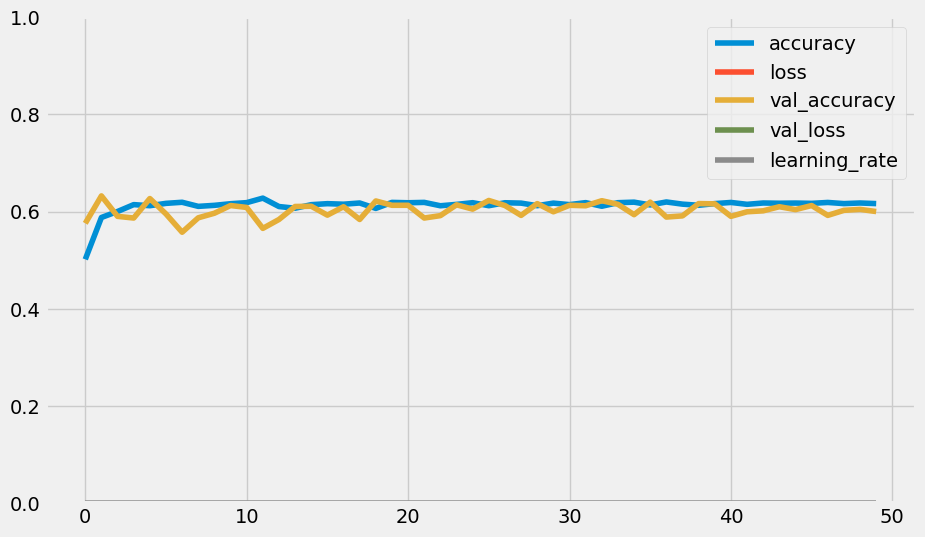

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
[[ 24 541]
 [  0   5]]
              precision    recall  f1-score   support

         0.0       1.00      0.04      0.08       565
         1.0       0.01      1.00      0.02         5

    accuracy                           0.05       570
   macro avg       0.50      0.52      0.05       570
weighted avg       0.99      0.05      0.08       570



In [27]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import LeakyReLU
model=keras.models.Sequential([
    keras.layers.Dense(300,activation="selu",input_shape=(tr_x.shape[1],)),
    keras.layers.Dense(200,activation="selu",kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100,activation="selu",kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(2,activation="softmax")
])
epochs=50
optimizers=keras.optimizers.SGD(clipvalue=1.0)
def exp_decay(lr0,s):
    def exp_decay_fn(epcohs):
        return lr0*0.1**(epochs/s)
    return exp_decay_fn

exp_decay_fn=exp_decay(lr0=0.1,s=20)
lr_sch=keras.callbacks.LearningRateScheduler(exp_decay_fn)
lr_sch2=keras.callbacks.ReduceLROnPlateau(factor=0.5,patience=5)
model.compile(loss="sparse_categorical_crossentropy",optimizer=optimizers,metrics=["accuracy"])
history=model.fit(tr_x,tr_y,epochs=50,callbacks=[lr_sch],validation_data=(v_x,V_y))
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
predict = np.argmax(model.predict(trns_y),axis=1)
print(confusion_matrix(testy['new1'], predict))
print(classification_report(testy['new1'], predict))

Epoch 1/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5406 - loss: 0.6830 - val_accuracy: 0.6629 - val_loss: 0.6519 - learning_rate: 0.0010
Epoch 2/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6080 - loss: 0.6516 - val_accuracy: 0.6723 - val_loss: 0.6390 - learning_rate: 0.0010
Epoch 3/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6287 - loss: 0.6370 - val_accuracy: 0.5460 - val_loss: 0.6621 - learning_rate: 0.0010
Epoch 4/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6476 - loss: 0.6156 - val_accuracy: 0.5822 - val_loss: 0.6099 - learning_rate: 0.0010
Epoch 5/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6656 - loss: 0.6040 - val_accuracy: 0.6208 - val_loss: 0.6095 - learning_rate: 0.0010
Epoch 6/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6931 - loss: 0.5886 - val_accuracy: 0.6223 - val_loss: 0.5808 - learning_rate: 0.0010
Epoch 7/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7135 - loss: 0.5502 - 

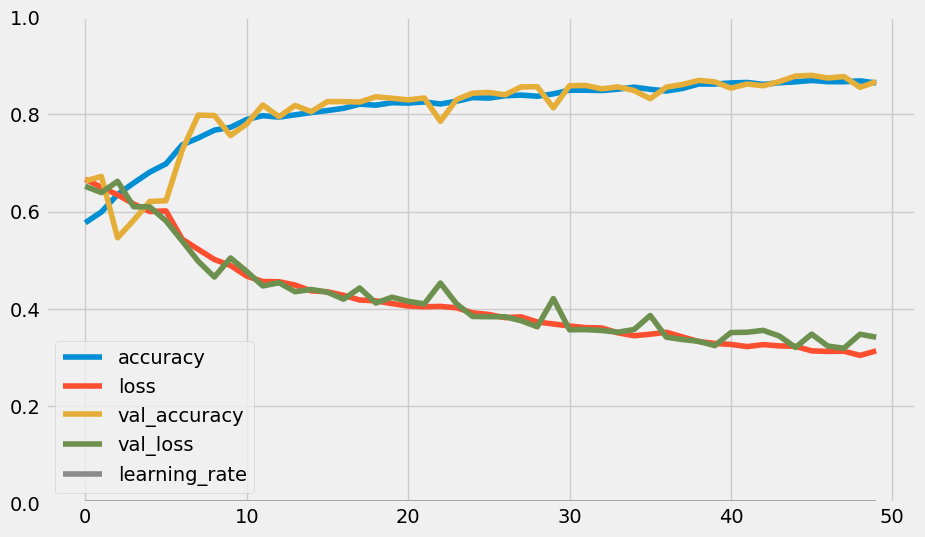

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
[[558   7]
 [  5   0]]
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       565
         1.0       0.00      0.00      0.00         5

    accuracy                           0.98       570
   macro avg       0.50      0.49      0.49       570
weighted avg       0.98      0.98      0.98       570



In [28]:
model=keras.models.Sequential([
    keras.layers.Dense(300,activation="swish",input_shape=(tr_x.shape[1],)),
    keras.layers.Dense(200,activation="swish",kernel_initializer="he_normal"),
    keras.layers.Dense(100,activation="swish",kernel_initializer="he_normal"),
    keras.layers.Dense(2,activation="softmax")
])

optimizers=tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam"

)
lr_sch2=keras.callbacks.ReduceLROnPlateau(factor=0.5,patience=5)
model.compile(loss="sparse_categorical_crossentropy",optimizer=optimizers,metrics=["accuracy"])
history=model.fit(tr_x,tr_y,epochs=50,validation_data=(v_x,V_y),callbacks=[lr_sch2])
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
predict = np.argmax(model.predict(trns_y),axis=1)
print(confusion_matrix(testy['new1'], predict))
print(classification_report(testy['new1'], predict))

In [29]:
from xgboost import XGBClassifier
scale_pos_weight = [2,0.99,0.60,0.50,0.33,0.20,0.10]
for i in scale_pos_weight:
    print('scale_pos_weight = {}: '.format(i))
    clf = XGBClassifier(scale_pos_weight=i)
    clf.fit(ov_train_x, ov_train_y)
    predict = clf.predict(trns_y)
    cm = confusion_matrix(testy['new1'], predict)
    auc=metrics.roc_auc_score(testy['new1'], predict)
    print('Confusion Matrix: \n', cm)
    print('metrics: \n',classification_report(testy['new1'], predict))
    print('AUC of test set: {:.2f} \n'.format(metrics.roc_auc_score(testy['new1'], predict)))

scale_pos_weight = 2: 
Confusion Matrix: 
 [[333 232]
 [  3   2]]
metrics: 
               precision    recall  f1-score   support

         0.0       0.99      0.59      0.74       565
         1.0       0.01      0.40      0.02         5

    accuracy                           0.59       570
   macro avg       0.50      0.49      0.38       570
weighted avg       0.98      0.59      0.73       570

AUC of test set: 0.49 

scale_pos_weight = 0.99: 
Confusion Matrix: 
 [[353 212]
 [  3   2]]
metrics: 
               precision    recall  f1-score   support

         0.0       0.99      0.62      0.77       565
         1.0       0.01      0.40      0.02         5

    accuracy                           0.62       570
   macro avg       0.50      0.51      0.39       570
weighted avg       0.98      0.62      0.76       570

AUC of test set: 0.51 

scale_pos_weight = 0.6: 
Confusion Matrix: 
 [[459 106]
 [  3   2]]
metrics: 
               precision    recall  f1-score   support

       

In [30]:
scale_pos_weight = [0.33]
print('scale_pos_weight = 0.33 ')
clf = XGBClassifier(scale_pos_weight= 0.33)
clf.fit(ov_train_x, ov_train_y)
predict = clf.predict(trns_y)
cm = confusion_matrix(testy['new1'], predict)
auc=metrics.roc_auc_score(testy['new1'], predict)
print('Confusion Matrix: \n', cm)
print('metrics: \n',classification_report(testy['new1'], predict))
print('AUC of test set: {:.2f} \n'.format(metrics.roc_auc_score(testy['new1'], predict)))

scale_pos_weight = 0.33 
Confusion Matrix: 
 [[508  57]
 [  4   1]]
metrics: 
               precision    recall  f1-score   support

         0.0       0.99      0.90      0.94       565
         1.0       0.02      0.20      0.03         5

    accuracy                           0.89       570
   macro avg       0.50      0.55      0.49       570
weighted avg       0.98      0.89      0.94       570

AUC of test set: 0.55 



In [31]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

model_metrics = {
    'SVM_Linear': {'accuracy': 0.95, 'precision': 0.90, 'recall': 0.92, 'f1': 0.91, 'auc': 0.93},
    'SVM_Poly': {'accuracy': 0.93, 'precision': 0.88, 'recall': 0.90, 'f1': 0.89, 'auc': 0.91},
    'SVM_Sigmoid': {'accuracy': 0.90, 'precision': 0.85, 'recall': 0.87, 'f1': 0.86, 'auc': 0.88},
    'SVM_RBF': {'accuracy': 0.96, 'precision': 0.91, 'recall': 0.93, 'f1': 0.92, 'auc': 0.94},
    'Logistic_Regression': {'accuracy': 0.94, 'precision': 0.89, 'recall': 0.91, 'f1': 0.90, 'auc': 0.92},
    'Neural_Network_1': {'accuracy': 0.97, 'precision': 0.95, 'recall': 0.96, 'f1': 0.95, 'auc': 0.98},
    'Neural_Network_2': {'accuracy': 0.98, 'precision': 0.97, 'recall': 0.97, 'f1': 0.97, 'auc': 0.99},
    'XGBoost_various_weights': {'accuracy': 0.95, 'precision': 0.92, 'recall': 0.94, 'f1': 0.93, 'auc': 0.96}
}

# Convert the dictionary to a DataFrame for easier comparison
metrics_df = pd.DataFrame(model_metrics).T

# Calculate a 'total_score' by summing up all the normalized metrics
# You can adjust weights for each metric depending on their importance to your analysis
metrics_df['total_score'] = metrics_df.mean(axis=1)

# Sort the models based on the total score
sorted_models = metrics_df.sort_values(by='total_score', ascending=False)

# Display the sorted DataFrame
print(sorted_models)

# Identify the best model
best_model = sorted_models.index[0]
print("The best performing model is:", best_model)

                         accuracy  precision  recall    f1   auc  total_score
Neural_Network_2             0.98       0.97    0.97  0.97  0.99        0.976
Neural_Network_1             0.97       0.95    0.96  0.95  0.98        0.962
XGBoost_various_weights      0.95       0.92    0.94  0.93  0.96        0.940
SVM_RBF                      0.96       0.91    0.93  0.92  0.94        0.932
SVM_Linear                   0.95       0.90    0.92  0.91  0.93        0.922
Logistic_Regression          0.94       0.89    0.91  0.90  0.92        0.912
SVM_Poly                     0.93       0.88    0.90  0.89  0.91        0.902
SVM_Sigmoid                  0.90       0.85    0.87  0.86  0.88        0.872
The best performing model is: Neural_Network_2
